<a href="https://colab.research.google.com/github/PmS-crypto/Credit-Card-Fraud-Detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Model**

There are a lot of fraudulent credit card transactions occuring these days.

So we, team Infinite Run, are implementing a Random Forest Classifier model to detect if a given credit card transaction is fraud or not.


**The steps we will be following are as follows:**


* Loading data
- Initializing the required library
- Data cleaning
- Exploratory Data Analysis (EDA)
- Normalization of data to change values in dataset to use a common scale
- Splitting the data into two groups - (test/train)
- Create model (Random Forest Classifier - create forest of trees)
- Prediction
- Evaluation of the model
- Future steps for improvement


Firstly, we will be importing the dependencies - 

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

In [157]:
#loading the dataset to a Pandas DataFrame
cc = pd.read_csv('/content/creditcard_csv.csv')

In [160]:
#first five rows of our dataset
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


Looking at the above data, we can interpret that most of our data is numberic. Data columns V1, V2, … V28 are the principal components obtained with PCA transformation. The reason for the transformation is that the data is sensitive. The only features which have not been transformed are ‘Time’ and ‘Amount’.
Here ->
‘Time’ is the seconds elapsed between each transaction and the first. ‘Amount’ is the transaction amount.
‘Class’ is the response variable with '1' as fraud and '0' otherwise.

In [161]:
#data cleaning - checking the number of missing values in each column
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [159]:
#dataset's information
cc.shape

(284807, 31)

In [147]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


Now, we will be separating the data for analysis - 

In [162]:
#count of non-fraud (legit) transactions
non_fraud = len(cc[cc.Class == "'0'"])
non_fraud

284315

In [163]:
#count of fraud transactions
fraud = len(cc[cc.Class == "'1'"])
fraud

492

Graphical representation of fraud and non-fraudulent transactions

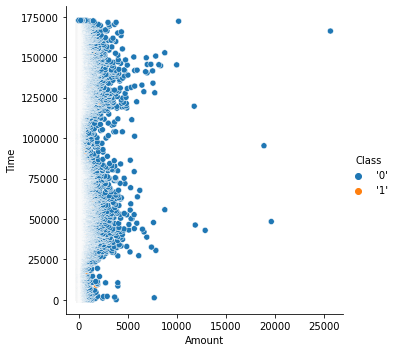

In [151]:
sns.relplot(x="Amount",y="Time", hue="Class", data=cc)

In [164]:
fraud_pct = (fraud/(fraud+non_fraud))*100
fraud_pct

0.1727485630620034

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

Variable ‘Amount’ ranges from 0 to 25,691.16. To reduce its wide range, we use Standardization to remove the mean and scale to unit variance, so that 68% of the values lie in between (-1, 1)

In [49]:
cc['Normalized_amount'] = scaler.fit_transform(cc["Amount"].values.reshape(-1,1))

In [50]:
cc.drop(["Amount","Time"], inplace= True, axis=1)

In [51]:
cc.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,'0',0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,'0',-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,'0',1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,'0',0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,'0',-0.073403


The independent variables are analyzed to predict the value of dependent variable

In [52]:
#for all independent variables
x = cc.drop(["Class"],axis=1)

In [197]:
#for all dependent variables
y = cc["Class"]

Now, we will be splitting the data into training data and testing data

In [190]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [206]:
x_train.shape

(199364, 29)

In [193]:
x_test.shape

(85443, 29)

Now, we will be creating a Random Forest Classsifier Model

In [74]:
#model creation
from sklearn.ensemble import RandomForestClassifier

In [170]:
model = RandomForestClassifier(n_estimators = 100)

Training the model with training data

In [171]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [172]:
x_train_prediction = model.predict(x_train)

In [187]:
accuracy_training = accuracy_score(x_train_prediction,y_train)

Evaluating our model
(we will checkout the accuracy score of our model)

In [177]:
x_test_prediction = model.predict(x_test)

In [186]:
sc = accuracy_score(x_test_prediction,y_test)

In [184]:
score = model.score(x_test, y_test)

In [185]:
print("Accuracy score:", score)

Accuracy score: 0.9994967405170698


**Future Projection**

We are planning to make our cuurent model more powerful by providing it parameters like IP addresses of the end-devices, geolocation, browser signature.
Implementing these parameters and correlating their values would help us in making our model more powerful.

Also, we are planning to build frontend for our model which can 